## Pen-Based Recognition of Handwritten Digits Data Set

In [1]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [2]:
def getAccuracy(model, X_test, y_test):
    """get accouracy of the model
    Input: model, X_test, y_test
    Output: the accuracy score
    """
    return model.score(X_test,y_test)*100

In [3]:
def printClassificationReport(model,X_test,y_test,title):
    print(title)
    y_true = y_test 
    y_pred = model.predict(X_test)
    print(classification_report(y_true, y_pred))

In [4]:
def getAccuracyAndConfusionMatrix(model,X_test,y_test,model_name,title):

    """plot the confusion matrix of a model
    Input: model, X_test, y_test , model_name , title
    Output: print the accuraccy of the model , print the confusion matrix
    """
    acc = getAccuracy(model, X_test,y_test)
    print("=======================================================================")
    print(f'Accuracy of {model_name}: {acc:.2f}%') 
    print("=======================================================================")
    predictions = model.predict(X_test)
    cm = confusion_matrix(y_test, predictions, labels=model.classes_)
    print(title)
    print(cm)
    print("=======================================================================")
    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
    disp.plot()
    
    plt.title(title,fontsize=16)
    plt.show()
    print("=======================================================================")
    printClassificationReport(model,X_test,y_test,f"Classification Report of : {model_name}")


### Loading the training and testing datasets 

In [5]:
import pandas as pd 

In [6]:
train_dataset = pd.read_csv("pendigits-tra.csv")
test_dataset  = pd.read_csv("pendigits-tes.csv")

In [7]:
print(f"the shape of the training set is : {train_dataset.shape}")
print(f"the shape of the testing  set is : {test_dataset.shape}")

the shape of the training set is : (7493, 17)
the shape of the testing  set is : (3497, 17)


In [8]:
train_dataset.head()

,47,100,27,81,57,37,26,0,0.1,23,56,53,100.1,90,40,98,8
0,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6,2
1,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0,1
2,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0,4
3,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0,1
4,100,100,88,99,49,74,17,47,0,16,37,0,73,16,20,20,6


In [9]:
test_dataset.head()

,88,92,2,99,16,66,94,37,70,0,0.1,24,42,65,100,100.1,8
0,80,100,18,98,60,66,100,29,42,0,0,23,42,61,56,98,8
1,0,94,9,57,20,19,7,0,20,36,70,68,100,100,18,92,8
2,95,82,71,100,27,77,77,73,100,80,93,42,56,13,0,0,9
3,68,100,6,88,47,75,87,82,85,56,100,29,75,6,0,0,9
4,70,100,100,97,70,81,45,65,30,49,20,33,0,16,0,0,1


All input attributes are integers in the range 0..100.
The last attribute is the class code 0..9

In [10]:
X_train = train_dataset.iloc[:, :-1]   
y_train = train_dataset.iloc[:, -1] 

X_test = test_dataset.iloc[:, :-1]   
y_test = test_dataset.iloc[:, -1] 

In [11]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

### 2. Apply decision tree to classify testing set, display accuracy and Confusion Matrix.


In [12]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state=2022)
clf = clf.fit(X_train, y_train)

Accuracy of Decision Tree: 91.59%
confusion matrix of applying Decsion Tree on the Test set
[[340   0   0   0   0   0   1  11  11   0]
 [  0 317  44   2   1   0   0   0   0   0]
 [  0  12 345   1   0   2   0   4   0   0]
 [  0  10   7 311   0   2   0   3   0   3]
 [  0   3   2   0 350   4   2   0   0   3]
 [  0   2   0  26   3 286   0   3   3  12]
 [  9   1   1   0   0   4 317   3   1   0]
 [  0  17   4   8  24   0   1 308   2   0]
 [  9   1   0   1   1   3   1   0 319   0]
 [  0   9   0   3   2   4   0   5   3 310]]


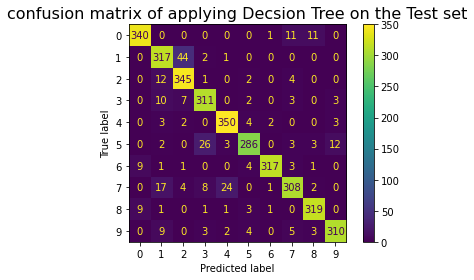

Classification Report of : Decision Tree
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       363
           1       0.85      0.87      0.86       364
           2       0.86      0.95      0.90       364
           3       0.88      0.93      0.90       336
           4       0.92      0.96      0.94       364
           5       0.94      0.85      0.89       335
           6       0.98      0.94      0.96       336
           7       0.91      0.85      0.88       364
           8       0.94      0.95      0.95       335
           9       0.95      0.92      0.93       336

    accuracy                           0.92      3497
   macro avg       0.92      0.92      0.92      3497
weighted avg       0.92      0.92      0.92      3497



In [13]:
getAccuracyAndConfusionMatrix(clf,X_test,y_test,"Decision Tree","confusion matrix of applying Decsion Tree on the Test set")

------------------------------------------------------------------------------------------------------------------

## Bagging


+ Bootstrap aggregating (Bagging):
    + the same learning algorithm but train each learner on a different set of the data. 


`3.(a) Apply bagging strategy to classify test set samples by using SVM and Decision Tree algorithm as base estimators. Display accuracy and Confusion Matrix`.


In [14]:
from sklearn.ensemble import BaggingClassifier
def applyBaggingStrategy(X_train, y_train,X_test,y_test,base_title,base=None,n=10):
    estimator = BaggingClassifier(base_estimator=base,random_state=2022,n_estimators=n)
    estimator.fit(X_train, y_train)
    getAccuracyAndConfusionMatrix(estimator,X_test,y_test,f'Bagging strategy using {base_title}',f"confusion matrix of applying Bagging strategy using {base_title} on the Test set")

In [15]:
def applyBaggingStratgyReturnACC(X_train, y_train,X_test,y_test,base_title,base=None,n=10):
    estimator = BaggingClassifier(base_estimator=base,random_state=2022,n_estimators=n)
    estimator.fit(X_train, y_train)
    acc = getAccuracy(estimator, X_test, y_test)
    return acc

## Apply bagging strategy to classify test set samples by using Decision Tree algorithm 

Accuracy of Bagging strategy using the default Base estimtor (Decision Tree): 94.71%
confusion matrix of applying Bagging strategy using the default Base estimtor (Decision Tree) on the Test set
[[346   0   0   0   0   0   1   0  16   0]
 [  0 339  22   1   1   0   0   1   0   0]
 [  0   7 355   0   0   1   0   1   0   0]
 [  0   4   1 328   0   1   0   0   0   2]
 [  0   1   3   1 353   3   1   0   0   2]
 [  0   1   0   6   9 300   0   0   5  14]
 [  0   1   0   0   2   4 328   0   1   0]
 [  0  37   1   2   1   0   0 320   3   0]
 [  4   1   0   0   0   1   0   0 329   0]
 [  0   9   0   1   2   4   3   2   1 314]]


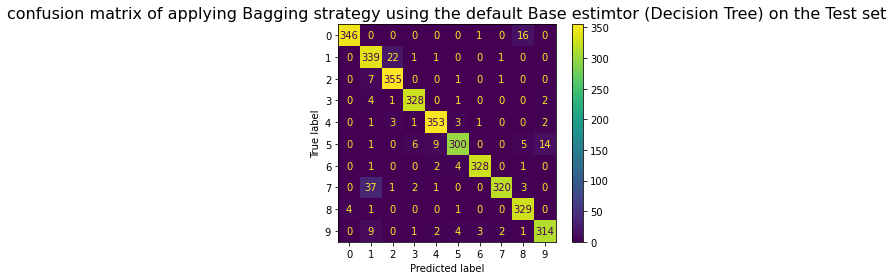

Classification Report of : Bagging strategy using the default Base estimtor (Decision Tree)
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       363
           1       0.85      0.93      0.89       364
           2       0.93      0.98      0.95       364
           3       0.97      0.98      0.97       336
           4       0.96      0.97      0.96       364
           5       0.96      0.90      0.92       335
           6       0.98      0.98      0.98       336
           7       0.99      0.88      0.93       364
           8       0.93      0.98      0.95       335
           9       0.95      0.93      0.94       336

    accuracy                           0.95      3497
   macro avg       0.95      0.95      0.95      3497
weighted avg       0.95      0.95      0.95      3497



In [16]:
applyBaggingStrategy(X_train, y_train,X_test,y_test,"the default Base estimtor (Decision Tree)",base=None)

## Apply bagging strategy to classify test set samples by using SVM algorithm 

Accuracy of Bagging strategy using SVC as a Base estimtor : 98.11%
confusion matrix of applying Bagging strategy using SVC as a Base estimtor  on the Test set
[[354   0   0   0   0   0   0   0   9   0]
 [  0 351  12   0   1   0   0   0   0   0]
 [  0   2 362   0   0   0   0   0   0   0]
 [  0   1   0 333   0   0   0   0   0   2]
 [  0   0   0   0 358   5   1   0   0   0]
 [  0   0   0   4   0 329   0   0   0   2]
 [  0   1   0   0   0   0 335   0   0   0]
 [  0  13   2   0   0   0   0 345   0   4]
 [  0   1   0   0   0   1   0   0 333   0]
 [  0   1   0   0   0   0   0   3   1 331]]


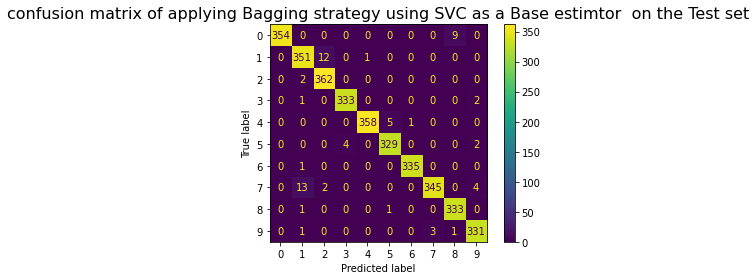

Classification Report of : Bagging strategy using SVC as a Base estimtor 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       363
           1       0.95      0.96      0.96       364
           2       0.96      0.99      0.98       364
           3       0.99      0.99      0.99       336
           4       1.00      0.98      0.99       364
           5       0.98      0.98      0.98       335
           6       1.00      1.00      1.00       336
           7       0.99      0.95      0.97       364
           8       0.97      0.99      0.98       335
           9       0.98      0.99      0.98       336

    accuracy                           0.98      3497
   macro avg       0.98      0.98      0.98      3497
weighted avg       0.98      0.98      0.98      3497



In [17]:
from sklearn.svm import SVC
applyBaggingStrategy(X_train, y_train,X_test,y_test,"SVC as a Base estimtor ",base=SVC())

`(b) Find the best number of estimators as taking Decision Tree base estimator.
 Try 5 different values within the interval of [10, 200]. 
 Plot accuracy vs. number of estimators.`



In [18]:
num_estimators=[20,60,100,140,180]
accuracies = []

for i in num_estimators : 
    acc = applyBaggingStratgyReturnACC(X_train, y_train,X_test,y_test,"Decision Tree as a Base estimtor ",base=None,n=i)
    accuracies.append(acc)
    print(f"number of estimator :{i}")
    print(f"accuracy            :{acc:.2f}%")
    print("===================================================")

number of estimator :20
accuracy            :94.85%
number of estimator :60
accuracy            :95.11%
number of estimator :100
accuracy            :95.22%
number of estimator :140
accuracy            :95.34%
number of estimator :180
accuracy            :95.37%


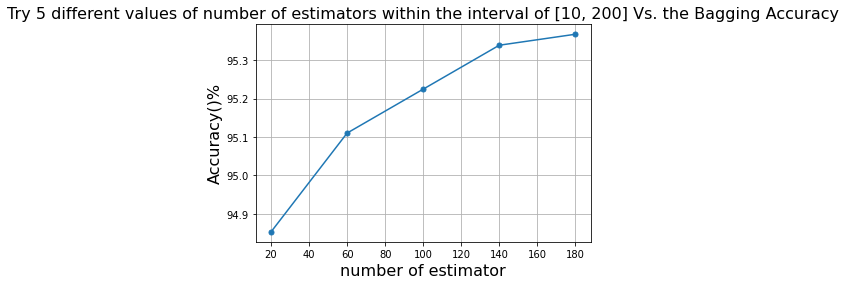

In [19]:
import matplotlib.pyplot as plt

plt.plot(num_estimators, accuracies,marker='o', markersize=5)
plt.xlabel('number of estimator',fontsize=16)
plt.ylabel('Accuracy()%',fontsize=16)
plt.title("Try 5 different values of number of estimators within the interval of [10, 200] Vs. the Bagging Accuracy",fontsize=16)
plt.grid()
plt.show()

-------------------------------------------------------------------------------------------------------------------

## Boosting


(a) Use GradientBoosting classifier to classify test set samples. 
- First, tune number of estimators parameter by trying 4 values in the interval of [10, 200]. 
- Then by using the tuned value for number of estimators, tune the learning rate parameter by trying 4 values within the range of [0.1, 0.9]. 
- Display accuracy and Confusion Matrix separately for the best value of both parameters (Number of estimators and learning rate).



In [20]:
from sklearn.ensemble import GradientBoostingClassifier

def applyBoostingAndReturnAcc(X_train,y_train,X_test,y_test,n=100,lr=0.1):
    estimator = GradientBoostingClassifier(n_estimators=n,learning_rate=lr,random_state=2022)
    estimator.fit(X_train, y_train)
    acc = getAccuracy(estimator, X_test, y_test)
    return acc

### First, tune number of estimators parameter by trying 4 values in the interval of [10, 200].

In [21]:
num_estimators = [50,100,150,200]
Boosting_accuracies = []
for i in num_estimators:
    acc = applyBoostingAndReturnAcc(X_train,y_train,X_test,y_test,n=i)
    Boosting_accuracies.append(acc)
    print(f"number of estimator :{i}")
    print(f"accuracy            :{acc:.2f}%")
    print("===================================================")

number of estimator :50
accuracy            :95.00%
number of estimator :100
accuracy            :96.23%
number of estimator :150
accuracy            :96.48%
number of estimator :200
accuracy            :96.57%


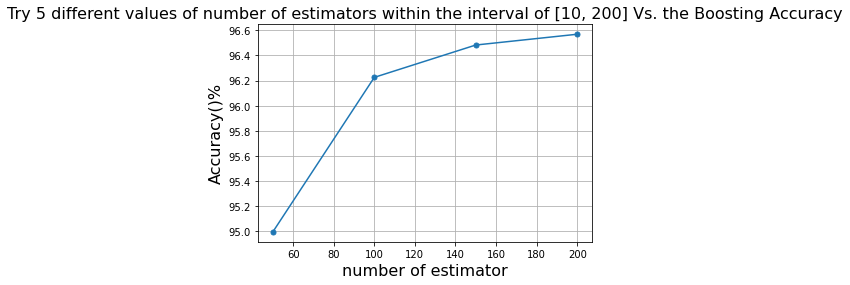

In [22]:
plt.plot(num_estimators, Boosting_accuracies,marker='o', markersize=5)
plt.xlabel('number of estimator',fontsize=16)
plt.ylabel('Accuracy()%',fontsize=16)
plt.title("Try 5 different values of number of estimators within the interval of [10, 200] Vs. the Boosting Accuracy",fontsize=16)
plt.grid()
plt.show()

### Then by using the tuned value for number of estimators, tune the learning rate parameter by trying 4 values within the range of [0.1, 0.9].

In [23]:
lr_values = [0.2,0.4,0.6,0.8]
estimators_best_num = 200
Boosting_accuracies = []
for i in lr_values:
    acc = applyBoostingAndReturnAcc(X_train,y_train,X_test,y_test,n=estimators_best_num,lr=i)
    Boosting_accuracies.append(acc)
    print(f"Learning rate value :{i}")
    print(f"number of estimators:{estimators_best_num}")
    print(f"accuracy            :{acc:.2f}%")
    print("===================================================")

Learning rate value :0.2
number of estimators:200
accuracy            :96.45%
Learning rate value :0.4
number of estimators:200
accuracy            :91.68%
Learning rate value :0.6
number of estimators:200
accuracy            :26.05%
Learning rate value :0.8
number of estimators:200
accuracy            :8.75%


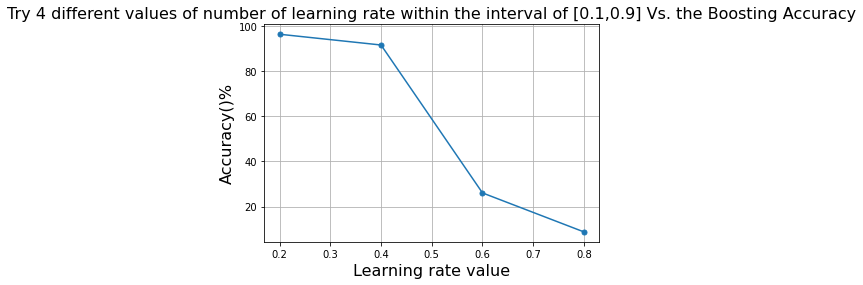

In [24]:
plt.plot(lr_values, Boosting_accuracies,marker='o', markersize=5)
plt.xlabel('Learning rate value',fontsize=16)
plt.ylabel('Accuracy()%',fontsize=16)
plt.title("Try 4 different values of number of learning rate within the interval of [0.1,0.9] Vs. the Boosting Accuracy",fontsize=16)
plt.grid()
plt.show()

### Display accuracy and Confusion Matrix separately for the best value of both parameters (Number of estimators and learning rate).

In [25]:
def applyBoostingStrategy(X_train,y_train,X_test,y_test,n=100,lr=i):
    estimator = GradientBoostingClassifier(n_estimators=n,learning_rate=lr,random_state=2022)
    estimator.fit(X_train, y_train)
    print(f"Learning rate value :{lr}")
    print(f"number of estimators:{n}")
    print(f"accuracy            :{estimator.score(X_test, y_test)*100:.2f}%")
    print("===================================================")
    getAccuracyAndConfusionMatrix(estimator,X_test,y_test,f'Boosting strategy using GradientBoostingClassifier with {n} estimators and {lr} Learning rate',f"confusion matrix of applying Boosting strategy using GradientBoostingClassifier with {n} estimators and {lr} Learning rate on test data")

Learning rate value :0.2
number of estimators:200
accuracy            :96.45%
Accuracy of Boosting strategy using GradientBoostingClassifier with 200 estimators and 0.2 Learning rate: 96.45%
confusion matrix of applying Boosting strategy using GradientBoostingClassifier with 200 estimators and 0.2 Learning rate on test data
[[343   0   0   0   0   0   0   0  20   0]
 [  0 349  13   0   1   1   0   0   0   0]
 [  0   2 362   0   0   0   0   0   0   0]
 [  0   2   0 332   0   0   0   1   0   1]
 [  0   0   0   1 363   0   0   0   0   0]
 [  0   1   0   7   0 306   0   0   4  17]
 [  0   0   0   0   0   1 335   0   0   0]
 [  0  31   4   0   0   0   0 325   0   4]
 [  1   0   0   0   0   0   0   0 334   0]
 [  0   6   0   4   0   0   0   1   1 324]]


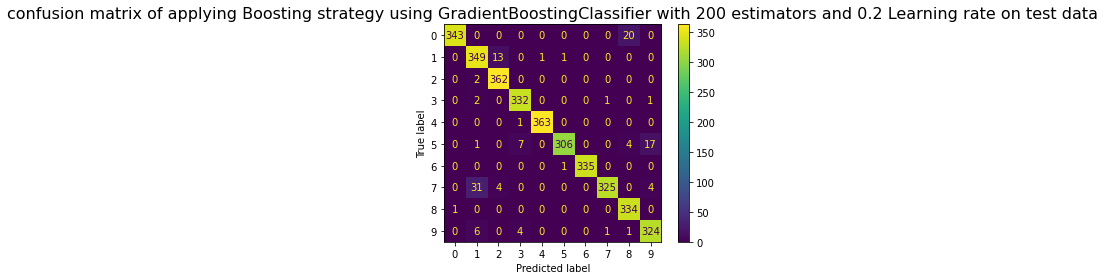

Classification Report of : Boosting strategy using GradientBoostingClassifier with 200 estimators and 0.2 Learning rate
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       363
           1       0.89      0.96      0.92       364
           2       0.96      0.99      0.97       364
           3       0.97      0.99      0.98       336
           4       1.00      1.00      1.00       364
           5       0.99      0.91      0.95       335
           6       1.00      1.00      1.00       336
           7       0.99      0.89      0.94       364
           8       0.93      1.00      0.96       335
           9       0.94      0.96      0.95       336

    accuracy                           0.96      3497
   macro avg       0.97      0.96      0.96      3497
weighted avg       0.97      0.96      0.96      3497



In [26]:
applyBoostingStrategy(X_train,y_train,X_test,y_test,n=200,lr=0.2)

### (b) Build XGBoost classifier with the same parameters that you obtained in question (4-a). Provide accuracy and Confusion Matrix.

In [27]:
# !pip install xgboost
import xgboost as xgb

Accuracy of Boosting strategy using XGBoost with 200 estimators and 0.2 Learning rate: 96.65%
confusion matrix of applying Boosting strategy using XGBoost with 200 estimators and 0.2 Learning rate on test data
[[343   0   0   0   0   0   0   0  20   0]
 [  0 345  16   0   1   1   0   1   0   0]
 [  0   2 361   0   0   0   0   1   0   0]
 [  0   2   0 332   0   0   0   1   0   1]
 [  0   0   0   0 362   2   0   0   0   0]
 [  0   0   0   7   0 321   1   1   0   5]
 [  0   0   1   0   0   1 333   0   1   0]
 [  0  28   3   0   0   0   0 325   0   8]
 [  1   0   0   0   0   0   0   0 334   0]
 [  0   5   0   5   0   0   0   1   1 324]]


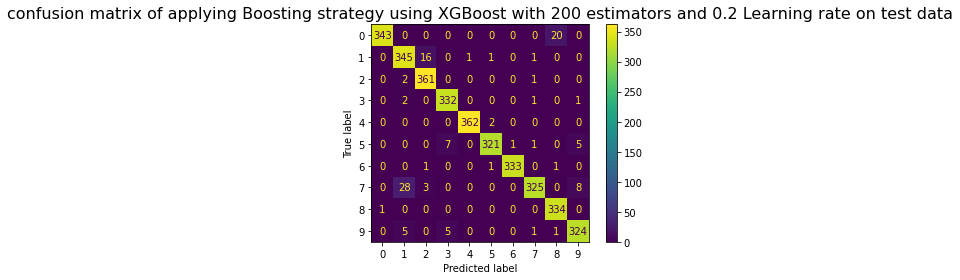

Classification Report of : Boosting strategy using XGBoost with 200 estimators and 0.2 Learning rate
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       363
           1       0.90      0.95      0.92       364
           2       0.95      0.99      0.97       364
           3       0.97      0.99      0.98       336
           4       1.00      0.99      1.00       364
           5       0.99      0.96      0.97       335
           6       1.00      0.99      0.99       336
           7       0.98      0.89      0.94       364
           8       0.94      1.00      0.97       335
           9       0.96      0.96      0.96       336

    accuracy                           0.97      3497
   macro avg       0.97      0.97      0.97      3497
weighted avg       0.97      0.97      0.97      3497



In [28]:
xgb_model = xgb.XGBClassifier(learning_rate=0.2,n_estimators=200, random_state=2022)
xgb_model.fit(X_train.values, y_train.values)
getAccuracyAndConfusionMatrix(xgb_model,X_test.values,y_test.values,f'Boosting strategy using XGBoost with {200} estimators and {0.2} Learning rate',f"confusion matrix of applying Boosting strategy using XGBoost with {200} estimators and {0.2} Learning rate on test data")

### (c) Compare XGBoost classifier and GradientBoosting classifier performance. Which metric is the best to compare performance, accuracy or confusion matrix? 

##Comment on Bagging and Boosting approches based on question 3 and 4.

## References 

1. https://scikit-learn.org/stable/modules/tree.html
2. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html
3. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
4. https://xgboost.readthedocs.io/en/latest/index.html
5. https://xgboost.readthedocs.io/en/stable/parameter.html